# Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
mpg_dataset = sns.load_dataset("mpg")

features = mpg_dataset[['horsepower']]
target = mpg_dataset['mpg']

In [ ]:
train_features, test_features , train_target , test_target = train_test_split(features, target, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
scaled_train_features =  scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [9]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters= 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.bias = None
        self.weight = None
        self.cost_history = []
        self.bias_history = []
        self.weight_history = []
    
    def fit(self, X , y):
        n_samples , n_features = X.shape

        # initialize parameteres
        self.bias = 0
        self.weight = np.zeros(n_features)

        # gradient_descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X , self.weight) + self.bias
        
        # compute gradients

        dw = (1 / n_samples) * np.dot(X.T , (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        self.weight -= self.lr * dw
        self.bias -= self.lr * db

        # calculate cost
        cost = (1 / n_samples) * np.sum((y_predicted - y) ** 2)
        self.cost_history.append(cost)
        self.bias_history.append(self.bias)
        self.weight_history.append(self.weight[0])

    def predict(self, X):
        return np.dot(X , self.weight) + self.bias

In [15]:
linear_resgression = LinearRegression()
linear_resgression.fit(scaled_train_features, train_target)

y_pred = linear_resgression.predict(scaled_test_features)

d:\anaconda13\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


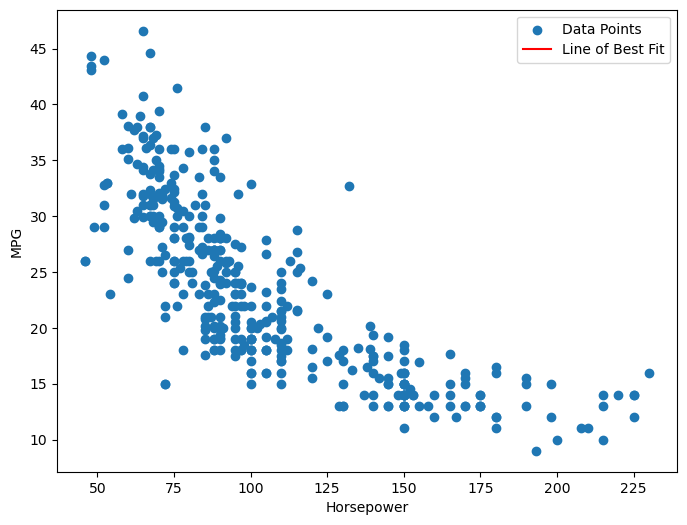

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(features['horsepower'], target, label='Data Points')
plt.xlabel('Horsepower')
plt.ylabel("MPG")

# line of best fit
x_line = np.linspace(min(features['horsepower']), max(features['horsepower']), len(features)).reshape(-1, 1)
y_line = linear_resgression.predict(scaler.transform(x_line))
plt.plot(x_line, y_line, color='red', label='Line of Best Fit')

plt.legend()
plt.show()